# **DATA ANALYSIS - "PICK_DATA"**

## Packages

### Installing packages

In [1]:
# !pip3 install numpy
# !pip3 install --upgrade pip
# !pip3 install pandas
# !pip3 install matplotlib
# ! pip3 install seaborn

### Importing packages

In [2]:
import time
import random
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from itertools import combinations
from IPython.display import clear_output

## Functions

Function that returns an overview of the **pick_data** based on all columns

In [3]:
# function that returns an overview of the pick_data based on all columns
def general_overview(pick_data):

    #get unique values for each variable
    unique_number_of_products = len(set(pick_data.product_id.values))
    unique_number_of_categories = len(set(pick_data.category.values))
    unique_number_of_source_order_ids = len(set(pick_data.source_order_id.values))
    unique_number_of_order_numbers = len(set(pick_data.order_number.values))
    unique_number_of_positions_in_order = len(set(pick_data.position_in_order.values))
    unique_number_of_quantity_unit = len(set(pick_data.quantity_unit.values))

    # print the results for a better understanding
    print("The length of the data is: ", len(pick_data))
    print("-----")
    print("-----")
    print("product_id")
    print("The number of unique product_id is: ",  unique_number_of_products)
    print("-----")
    print("category")
    print("The number of unique category is: ", unique_number_of_categories)
    print("-----")
    print("source_order_id")
    print("The number of unique source_order_id is: ", unique_number_of_source_order_ids)
    print("-----")
    print("order_number")
    print("The number of unique order_number is: ", unique_number_of_order_numbers)
    print("-----")
    print("position_in_order")
    print("The number of unique position_in_order is: ", unique_number_of_positions_in_order)
    print("-----")
    print("pick_volume")
    print("The min value of pick_volume is: ", pick_data.pick_volume.min())
    print("The max value of pick_volume is: ", pick_data.pick_volume.max())
    print("-----")
    print("quantity_unit")
    print("The number of unique quantity_unit is: ", unique_number_of_quantity_unit)
    print("-----")
    print("date_time")
    print("The first date_time of the picks_data is: ", pick_data.date_time.min())
    print("The last date_time of the picks_data is: ", pick_data.date_time.max())

Function that checks duplicate rows showing their duplicated partners based on a column selection

In [4]:
def check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate):

    index_row_pick_data = pick_data.loc[index_to_check, columns_to_evaluate]

    matching_rows = pick_data[pick_data[columns_to_evaluate].eq(index_row_pick_data).all(axis=1)]
    
    return(matching_rows)

Function that checks if integer list is sequential

In [5]:
def is_sequential(int_list):
    # Sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # Check if each consecutive number differs by 1
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            return False

    return True

Function that counts the number of times a list is not sequential

In [6]:
def count_non_sequential(int_list):
    # Sort the list first (if not already sorted)
    sorted_list = sorted(int_list)

    # Initialize a counter for non-sequential occurrences
    non_sequential_count = 0

    # Check each consecutive number
    for i in range(len(sorted_list) - 1):
        if sorted_list[i + 1] != sorted_list[i] + 1:
            non_sequential_count += 1

    return non_sequential_count

Function that identifies the **outliers** in **product_id** taking parameters **Q1**, **Q3**

In [7]:
def product_id_volume_outliers(Q1, Q3, df, product_id):
    
    pick_data_volume_evaluation = df.copy()
    pick_data_volume_evaluation = pick_data_volume_evaluation[pick_data_volume_evaluation["product_id"] == product_id]
    pick_data_volume_evaluation = pick_data_volume_evaluation.reset_index(drop=True)

    Q1 = pick_data_volume_evaluation['pick_volume'].quantile(Q1)
    Q3 = pick_data_volume_evaluation['pick_volume'].quantile(Q3)

    # Calculate IQR
    IQR = Q3 - Q1

    # Define bounds for outliers
    # lower_bound = Q1 - 1.5 * IQR
    lower_bound = 0
    upper_bound = Q3 + 1.5 * IQR

    print(lower_bound, upper_bound)

    # Identify outliers
    outliers = pick_data_volume_evaluation[(pick_data_volume_evaluation["pick_volume"] < lower_bound) | (pick_data_volume_evaluation["pick_volume"] > upper_bound)]

    return outliers 

## Importing data (E)

### Importing data

In [8]:
# read cvs pick_data file
pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)

/var/folders/0m/9hrzmrmx5rvbnxjrsct8cd500000gn/T/ipykernel_4585/757817874.py:2: DtypeWarning: Columns (0,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pick_data = pd.read_csv("/Users/ANDRES/Documents/GitHub/OBETAWarehousingAnalyticsProject/Data/003 pick_data.csv", header=None)


Head of data

In [9]:
# print head of data
pick_data.head()

,0,1,2,3,4,5,6,7
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


### Matching PBI Schema

Specify columns names

In [10]:
# rename columns of data to match schema
pick_data.columns = ["product_id", "category", "source_order_id", "order_number", "position_in_order", "pick_volume", "quantity_unit", "date_time"]

Check applied changes

In [11]:
# check head of data to see if columns match
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24.0000000
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35.0000000
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50.0000000
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51.0000000
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02.0000000


Matching data types

In [12]:
# assign data types to pick_data to match schema
pick_data["product_id"] = pick_data["product_id"].astype(str)
pick_data["category"] = pick_data["category"].astype(str)
pick_data["source_order_id"] = pick_data["source_order_id"].astype(str)
pick_data["order_number"] = pick_data["order_number"].astype(str)
pick_data["position_in_order"] = pick_data["position_in_order"].astype(int)
pick_data["pick_volume"] = pick_data["pick_volume"].astype(int)
pick_data["quantity_unit"] = pick_data["quantity_unit"].astype(str)
pick_data["date_time"] = pd.to_datetime(pick_data["date_time"])

In [13]:
# check head of data to evaluate if any change damaged pick_data
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


In [14]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


### Data description

General information

In [15]:
# check all data types before data manipulation
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


### Data chackpoint (E)

Save pick_data

In [16]:
pick_data = pick_data.copy()

## Data manipulation (T)

### Data homogeneity

#### General analysis

General view

In [17]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  -2000
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


#### Specific analysis

##### product_id

Check if **product_id** values are homogeneous

In [18]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


In [19]:
all(x.isdigit() for x in list(set(list(pick_data["product_id"].values))))

False

* **product_id** values are not always numerical

##### category

Check if products come from the same category everytime

In [20]:
# check data in category
print(set(pick_data.category.values))

{'SHL', 'AKL', 'HRL', 'Manuell', 'Kabellager'}


In [21]:
# create a loop to evaluation how many products are picked from different categories

category_unique_list = list(set(pick_data.category.values))

for i, j in list(combinations(category_unique_list, 2)):
            
            # create a merge dataframe matching the products the categories (warehouses) share with each other
            list_i = list(set(list(pick_data[pick_data["category"]==i]["product_id"].values)))
            list_j = list(set(list(pick_data[pick_data["category"]==j]["product_id"].values)))
            
            # compare lists to identify common values
            common_values_i_j = [x for x in list_i if x in list_j]
            
            # print the merge result
            print(i, " shares ", len(common_values_i_j), " product_id with ", j)

SHL  shares  42198  product_id with  AKL
SHL  shares  1622  product_id with  HRL
SHL  shares  9  product_id with  Manuell
SHL  shares  0  product_id with  Kabellager
AKL  shares  2452  product_id with  HRL
AKL  shares  11  product_id with  Manuell
AKL  shares  5  product_id with  Kabellager
HRL  shares  178  product_id with  Manuell
HRL  shares  550  product_id with  Kabellager
Manuell  shares  29  product_id with  Kabellager


* Same **product_id** values can be picked from **different category** values

In [22]:
pick_data.pivot_table(
    index="category",
    columns="source_order_id",
    values="position_in_order",
    aggfunc="max")

source_order_id,46,48
category,,
AKL,85,327
HRL,75,244
Kabellager,44,157
Manuell,44,324
SHL,85,436


> When the **source_order_id** is **46**, the **max position_in_order** is no grater than **85** in any warehouse

> Warehouses **AKL**, **Manuell**, **SHL** are the houses with greater **position_in_order**

In [23]:
pick_data.pivot_table(
    index="category",
    columns="source_order_id",
    values="order_number",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,3054740,8384293
HRL,1076252,3046273
Kabellager,96609,1808663
Manuell,262131,1670361
SHL,2970769,11518899


> Warehouses **AKL**, **HRL**, **SHL** have the **greater number of orders received** accross order types (**46**, **48**)

##### source_order_id

Check if **source_order_id** can vary in the same **order_number**

In [22]:
# check data in source_order_id
print(set(pick_data.source_order_id.values))

{'46', '48'}


In [23]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


In [24]:
# check how many times 48 and 46 are sharing orders accross the entire dataset
order_source_set_48 = list(set(list(pick_data[pick_data["source_order_id"] == "48"]["order_number"].values)))
order_source_set_46 = list(set(list(pick_data[pick_data["source_order_id"] == "46"]["order_number"].values)))

# common orders between source_order_id
# common_source_order_order_number = [x for x in order_source_set_48 if x in order_source_set_46]
common_source_order_order_number = set(order_source_set_48).intersection(order_source_set_46)

print("The number of same order_number shared between 46 & 48: ", len(common_source_order_order_number))

The number of same order_number shared between 46 & 48:  475719


##### quantity_unit

Check if quantity units are homogeneous for a **product_id**

In [25]:
# check data in source_order_id
print(set(pick_data.quantity_unit.values))

{'kg', 'Pa', 'Mt', 'VE', 'Ei', 'Ro', 'St', 'Se', 'Bl'}


In [45]:
# create empty dict for interation
quantity_unit_product_dict = {}

# create a set of unique product_id values for each quantity unit
product_list_St = list(set(pick_data[pick_data["quantity_unit"] == "St"]["product_id"].values))
product_list_Mt = list(set(pick_data[pick_data["quantity_unit"] == "Mt"]["product_id"].values))
product_list_Ei = list(set(pick_data[pick_data["quantity_unit"] == "Ei"]["product_id"].values))
product_list_kg = list(set(pick_data[pick_data["quantity_unit"] == "kg"]["product_id"].values))
product_list_Ro = list(set(pick_data[pick_data["quantity_unit"] == "Ro"]["product_id"].values))
product_list_Bl = list(set(pick_data[pick_data["quantity_unit"] == "Bl"]["product_id"].values))
product_list_VE = list(set(pick_data[pick_data["quantity_unit"] == "VE"]["product_id"].values))
product_list_Pa = list(set(pick_data[pick_data["quantity_unit"] == "Pa"]["product_id"].values))
product_list_Se = list(set(pick_data[pick_data["quantity_unit"] == "Se"]["product_id"].values))

# configure dictionary
quantity_unit_product_dict["product_list_St"] = product_list_St
quantity_unit_product_dict["product_list_Mt"] = product_list_Mt
quantity_unit_product_dict["product_list_Ei"] = product_list_Ei
quantity_unit_product_dict["product_list_kg"] = product_list_kg
quantity_unit_product_dict["product_list_Ro"] = product_list_Ro
quantity_unit_product_dict["product_list_Bl"] = product_list_Bl
quantity_unit_product_dict["product_list_VE"] = product_list_VE
quantity_unit_product_dict["product_list_Pa"] = product_list_Pa
quantity_unit_product_dict["product_list_Se"] = product_list_Se

# common orders between source_order_id
for i, j in list(combinations(list(quantity_unit_product_dict.keys()), 2)):
    common_product_id_quantity_unit = set(quantity_unit_product_dict[i]).intersection(quantity_unit_product_dict[j])
    print("The quantity_unit ", i[-2:], " shares ", len(common_product_id_quantity_unit), " product_id with ", j[-2:])

The quantity_unit  St  shares  7  product_id with  Mt
The quantity_unit  St  shares  0  product_id with  Ei
The quantity_unit  St  shares  0  product_id with  kg
The quantity_unit  St  shares  0  product_id with  Ro
The quantity_unit  St  shares  5  product_id with  Bl
The quantity_unit  St  shares  33  product_id with  VE
The quantity_unit  St  shares  28  product_id with  Pa
The quantity_unit  St  shares  0  product_id with  Se
The quantity_unit  Mt  shares  0  product_id with  Ei
The quantity_unit  Mt  shares  0  product_id with  kg
The quantity_unit  Mt  shares  0  product_id with  Ro
The quantity_unit  Mt  shares  0  product_id with  Bl
The quantity_unit  Mt  shares  0  product_id with  VE
The quantity_unit  Mt  shares  0  product_id with  Pa
The quantity_unit  Mt  shares  0  product_id with  Se
The quantity_unit  Ei  shares  0  product_id with  kg
The quantity_unit  Ei  shares  0  product_id with  Ro
The quantity_unit  Ei  shares  0  product_id with  Bl
The quantity_unit  Ei  sha

* We see that there are some **product_id** values that are measured in **different quantities**

##### position_in_order

In [27]:
# check data in position_in_order
position_in_order_set_list = list(set([int(x) for x in pick_data.position_in_order.values]))
print(position_in_order_set_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 22

* **position_in_order** seems to be **semi-continous** so it's a good idea to check some examples of how that variable behaviors in some **order_number** cases

Create a scatter plot over variable **position_in_order** to evaluate variable behavior

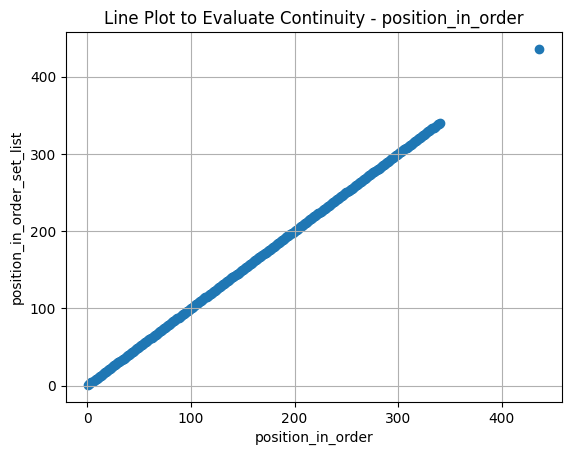

In [28]:
plt.scatter(position_in_order_set_list, position_in_order_set_list)
plt.title("Line Plot to Evaluate Continuity - position_in_order")
plt.xlabel("position_in_order")
plt.ylabel("position_in_order_set_list")
plt.grid(True)
plt.show()

* We clearly see that there's a break in the sequence after max position > 300

Check number of breaks in the sequence of **position_in_order**

In [29]:
sequential_count = count_non_sequential(position_in_order_set_list)
print("Max. position: ", sorted(position_in_order_set_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(position_in_order_set_list) == 0:
    print("The position_in_order_set_list: IS sequential")
else:
    print("The position_in_order_set_list: IS NOT sequential")

Max. position:  436
Number of breaks:  2
The position_in_order_set_list: IS NOT sequential


* **position_in_order** is a **non-continuous semi-continuous** variable with **two breaks**

> We proceed to theck the behavior of the variable **position_in_order** within a giving **order_number**

Check if **position_in_order** is a continues sequence from **1** to **n**

In [30]:
# check random order_number with position_in_order > 10
random_position = pick_data[pick_data["position_in_order"] > 10].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
17610371,C11372,HRL,48,6183218,1,1,St,2013-06-18 12:13:09
11361968,H83143,SHL,48,6183218,1,100,St,2017-01-16 23:34:42
11388443,H83162,SHL,48,6183218,2,20,St,2017-01-16 23:38:51
11377394,H83153,SHL,48,6183218,3,40,St,2017-01-16 23:38:51
9509488,D64083,SHL,48,6183218,4,20,St,2017-01-16 23:38:51
7527102,387123,SHL,48,6183218,5,10,St,2017-01-16 23:40:50
7527101,387123,SHL,48,6183218,5,30,St,2017-01-16 23:38:51
9502383,D64020,SHL,48,6183218,6,20,St,2017-01-16 23:40:50
9515406,D64148,SHL,48,6183218,7,20,St,2017-01-16 23:40:50
9522545,D64155,SHL,48,6183218,8,20,St,2017-01-16 23:40:50


In [31]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  18
Number of breaks:  0
The order_number:  6183218  IS sequential


In [32]:
# check random order_number with position_in_order > 100
random_position = pick_data[pick_data["position_in_order"] > 100].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
12907448,P55411,SHL,48,8354692,1,1,St,2018-02-26 12:47:09
10757759,G92344,SHL,48,8354692,2,25,St,2018-02-26 11:11:21
3991125,231575,SHL,48,8354692,3,1,Ro,2018-02-26 11:11:21
2514264,206186,SHL,48,8354692,4,50,St,2018-02-26 11:11:21
12040528,J51130,SHL,48,8354692,5,1,St,2018-02-26 11:11:21
...,...,...,...,...,...,...,...,...
6660170,330281,SHL,48,8354692,122,10,St,2018-02-26 12:47:06
12070304,J85125,SHL,48,8354692,123,1,St,2018-02-26 10:38:24
13416259,R12000,SHL,48,8354692,124,3,St,2018-02-26 10:38:23
11429498,H90615,SHL,48,8354692,125,8,St,2018-02-26 10:38:23


In [33]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  126
Number of breaks:  0
The order_number:  8354692  IS sequential


In [34]:
# check random order_number with position_in_order > 200
random_position = pick_data[pick_data["position_in_order"] > 200].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
14240256,T52786,SHL,48,5785750,1,20,St,2018-07-24 05:57:32
5274918,250252,SHL,48,5785750,2,10,St,2018-07-24 05:57:32
5274920,250252,SHL,48,5785750,2,50,St,2018-07-24 06:01:10
5274911,250252,SHL,48,5785750,2,45,St,2018-07-24 05:44:44
5274912,250252,SHL,48,5785750,2,50,St,2018-07-24 05:44:55
...,...,...,...,...,...,...,...,...
14446348,T95131,SHL,48,5785750,227,1,St,2018-07-24 07:26:23
14430586,T95020,SHL,48,5785750,228,1,St,2018-07-24 07:26:23
8921694,A96931,SHL,48,5785750,229,1,St,2018-07-24 07:26:23
14446882,T95202,SHL,48,5785750,230,1,St,2018-07-24 07:26:23


In [35]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  231
Number of breaks:  0
The order_number:  5785750  IS sequential


In [36]:
# check random order_number with position_in_order > 250
random_position = pick_data[pick_data["position_in_order"] > 250].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
12598774,O63054,SHL,48,7465236,1,25,St,2017-09-19 07:32:54
8653443,A18059,SHL,48,7465236,2,6,St,2017-09-19 07:32:54
12599655,O63196,SHL,48,7465236,3,7,St,2017-09-19 07:31:42
12599656,O63196,SHL,48,7465236,3,4,St,2017-09-19 07:32:54
10959615,H48306,SHL,48,7465236,4,9,St,2017-09-19 07:31:42
...,...,...,...,...,...,...,...,...
8656549,A19012,SHL,48,7465236,277,1,St,2017-09-19 07:15:13
8832909,A79299,SHL,48,7465236,278,1,St,2017-09-19 08:25:11
11408870,H83448,SHL,48,7465236,279,1,St,2017-09-19 07:15:13
8657136,A19372,SHL,48,7465236,280,1,St,2017-09-19 08:25:11


In [37]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  281
Number of breaks:  0
The order_number:  7465236  IS sequential


In [38]:
# check random order_number with position_in_order > 300
random_position = pick_data[pick_data["position_in_order"] > 300].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
13204980,P90454,SHL,48,7107682,1,67,St,2017-07-11 11:29:34
13204979,P90454,SHL,48,7107682,1,80,St,2017-07-11 11:22:26
16117697,P99724,Manuell,48,7107682,1,42,Mt,2013-12-17 00:37:01
13204964,P90450,AKL,48,7107682,2,14,St,2017-07-11 12:25:34
16117889,Q01195,AKL,48,7107682,2,10,St,2013-12-17 02:08:48
...,...,...,...,...,...,...,...,...
8612396,A05051,SHL,48,7107682,335,10,St,2017-07-11 12:20:42
13207274,P90522,SHL,48,7107682,336,1,St,2017-07-11 14:09:08
9242370,C13855,SHL,48,7107682,338,2,St,2017-07-11 14:12:06
13212735,P90889,SHL,48,7107682,339,1,St,2017-07-11 14:09:08


In [39]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  340
Number of breaks:  2
The order_number:  7107682  IS NOT sequential


In [40]:
# check random order_number with position_in_order > 400
random_position = pick_data[pick_data["position_in_order"] > 400].head(1)["order_number"].values[0]
pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
16067218,S04220,AKL,46,7140205,1,2,St,2013-12-27 04:21:27
10476032,G41665,SHL,48,7140205,1,134,St,2017-07-17 15:14:29
10393501,G41650,SHL,48,7140205,2,5,St,2017-07-17 15:14:29
10393500,G41650,HRL,48,7140205,2,160,St,2017-07-17 14:59:04
4918876,243603,SHL,48,7140205,3,12,St,2017-07-17 15:22:12
4918875,243603,SHL,48,7140205,3,70,St,2017-07-17 15:11:00
10585391,G41816,SHL,48,7140205,4,86,St,2017-07-17 15:22:12
10631239,G42023,SHL,48,7140205,5,1,St,2017-07-17 15:45:14
10631238,G42023,SHL,48,7140205,5,60,St,2017-07-17 15:22:12
4963528,243609,SHL,48,7140205,6,61,St,2017-07-17 15:45:14


In [41]:
# check if values in position_in_order are sequential
sorted_list = [int(x) for x in set(pick_data[pick_data["order_number"] == random_position].sort_values(by="position_in_order")["position_in_order"].values)]
sequential_count = count_non_sequential(sorted_list)
print("Max. position: ", sorted(sorted_list)[-1])
print("Number of breaks: ", sequential_count)
if count_non_sequential(sorted_list) == 0:
    print("The order_number: ", random_position, " IS sequential")
else:
    print("The order_number: ", random_position, " IS NOT sequential")

Max. position:  436
Number of breaks:  10
The order_number:  7140205  IS NOT sequential


> From the previous analysis we can check different things:

1) The grater the max position_in_order, the more number of breaks in the the sequence of the   variable (1; n)

2) We have to evaluate what to do with this order_number, since they could damage future analysis because of the breakes in the sequence

### Missing values

Checking missing values over all columns

In [42]:
# check count of missing values for each variable 
pick_data.isna().sum()

product_id           0
category             0
source_order_id      0
order_number         0
position_in_order    0
pick_volume          0
quantity_unit        0
date_time            0
dtype: int64

* Since there are no missing values, we can assume that the data is complete and we can proceed to validate the consistency of the variables

### Duplicates

#### General analysis

Check duplicates based on **all columns**

In [50]:
# get duplicates dataframe over the all columns
duplicates_pick_date = pick_data.duplicated(subset = list(pick_data.columns))
pick_data[duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
14,2,SHL,48,7055448,1,22,St,2017-06-30 12:50:40
68,12,AKL,48,8197426,3,4,St,2018-01-30 12:55:47
626,99,SHL,48,3302027,1,4,St,2020-07-14 07:00:04
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42
1998,384,SHL,48,1854647,1,1,St,2019-10-23 10:55:28


* We see that there are perfect duplicates

Get total length of perfect matches

In [51]:
# get the count of duplicated values
print(len(pick_data[duplicates_pick_date]))

8024


* We see that **8.024** rows are duplicates evaluating **all columns**

In [52]:
pick_data[duplicates_pick_date].pivot_table(
    index="category",
    columns="source_order_id",
    values="order_number",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,NaN,21.0
HRL,1.0,NaN
Kabellager,313.0,1001.0
Manuell,631.0,2307.0
SHL,668.0,3082.0


> Warehouse **SHL**, **Manuell**, **Kabellager** have the most number of perfect duplicates

> Warehouses **AKL** and **HRL** are the ones with less duplicates

#### Specific analysis

Check one duplicate example based on **all** column before taking any decission

In [45]:
# check the duplicated cases for row 14 over all columns (because we saw the index in the previous output)
index_to_check = 1327
columns_to_evaluate = list(pick_data.columns)

check_duplicates_row_columns(pick_data, index_to_check, columns_to_evaluate)

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
1326,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42
1327,255,Manuell,48,8883282,1,8,St,2018-11-21 00:33:42


* This is one of the **8.024** cases where registers are **exactly the same**

> Comparing this register with another register that doesn't follow this behavior

Getting registers **outside** the behavior of perfect duplicates

In [46]:
pick_data[~duplicates_pick_date].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


Check one **orde_number** that is **outside** the behavior of perfect duplicates

In [47]:
pick_data[pick_data["order_number"]=="7055448"].head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


* We see the **picks** are placed in a way that **date_time** and **pick_volume** could actually **overlap** within an **order_number**

> **Not recommendable to drop duplicates for several reasons:**

    1) We don't have a unique ID for pick_data, wich makes it difficult to make decissions over duplicates

    2) Orders are placed in a way that date_time and pick_volme can overlap within an order_number

### Outliers

#### Idenfy outliers

> For outliers identification we need to understand the variable where they could be allocated

Overview of pick_data 

In [48]:
# checking structure of data
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


In [49]:
# get a general overview
general_overview(pick_data)

The length of the data is:  33888990
-----
-----
product_id
The number of unique product_id is:  97338
-----
category
The number of unique category is:  5
-----
source_order_id
The number of unique source_order_id is:  2
-----
order_number
The number of unique order_number is:  6956136
-----
position_in_order
The number of unique position_in_order is:  340
-----
pick_volume
The min value of pick_volume is:  -2000
The max value of pick_volume is:  200000
-----
quantity_unit
The number of unique quantity_unit is:  9
-----
date_time
The first date_time of the picks_data is:  2011-06-23 00:00:01
The last date_time of the picks_data is:  2020-07-14 11:42:01


In [50]:
pick_data.head()

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
0,2,SHL,48,7055448,1,29,St,2017-06-30 11:15:24
1,2,SHL,48,7055448,1,30,St,2017-06-30 11:22:35
2,2,SHL,48,7055448,1,30,St,2017-06-30 12:04:50
3,2,SHL,48,7055448,1,20,St,2017-06-30 12:04:51
4,2,SHL,48,7055448,1,30,St,2017-06-30 12:05:02


* We are going to execute the outlier identification over all **integer** variables:

    1) **pick_volume**
    2) **position_in_order**

> **pick_volume** has to be evaluated by product

> **position_in_order** was already evaluated in *data homogeneity*

###### pick_volume

> Remember that the **pick_volume** from a **single product_id** can be measured with **different quantity_unit**

Check value ranges over **pick_volume** the dataframe

In [51]:
print(pick_data["pick_volume"].min())
print(pick_data["pick_volume"].max())

-2000
200000


* The range in **pick_volumne** has to greater than 0 

Check the dataframe filtered by **undesired pick_volume range**

In [52]:
pick_data[pick_data["pick_volume"]<=0]

,product_id,category,source_order_id,order_number,position_in_order,pick_volume,quantity_unit,date_time
107,32,AKL,48,6183218,18,0,St,2017-01-17 00:32:10
115,32,AKL,48,6183218,18,0,St,2017-01-17 00:35:46
465,77,AKL,48,7746735,3,0,St,2017-11-08 22:43:16
678,104,AKL,48,8221188,2,0,St,2018-02-01 21:34:15
682,104,AKL,48,8221188,2,0,St,2018-02-01 21:44:30
...,...,...,...,...,...,...,...,...
33875618,361725,HRL,46,6100367,3,0,St,2016-12-27 05:35:49
33875708,F23374,AKL,46,6100489,1,0,St,2016-12-27 05:42:42
33875866,392445,AKL,46,6105118,3,0,Pa,2016-12-28 22:28:11
33879292,855802,AKL,48,4170783,4,0,St,2016-12-29 17:08:01


* There are **190.371 registers** that are **adding noise** to the dataframe

Identify the **warehoses** responsable from this **product_id** invalid **pick_volume** values

In [48]:
pick_data[pick_data["pick_volume"]==0].pivot_table(
    index="category",
    columns="source_order_id",
    values="product_id",
    aggfunc="count")

source_order_id,46,48
category,,
AKL,85690.0,95805.0
HRL,382.0,1737.0
Kabellager,NaN,64.0
Manuell,505.0,4979.0
SHL,158.0,951.0


In [ ]:
pick_data[pick_data["pick_volume"]<0].pivot_table(
    index="category",
    columns="source_order_id",
    values="product_id",
    aggfunc="count")

source_order_id,46,48
category,,
SHL,7,93


> Most of the **zero** pick_volume are alocated in AKL

> All the **negative pick_volume** are alocated in **SHL**

In [26]:
pick_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33888990 entries, 0 to 33888989
Data columns (total 8 columns):
 #   Column             Dtype         
---  ------             -----         
 0   product_id         object        
 1   category           object        
 2   source_order_id    object        
 3   order_number       object        
 4   position_in_order  int64         
 5   pick_volume        int64         
 6   quantity_unit      object        
 7   date_time          datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 2.0+ GB


Drop 190.371 registers (see above)

In [ ]:
pick_data = pick_data[pick_data["pick_volume"]>0].reset_index(drop=True)
pick_data.head()

In [ ]:
# get a general overview
general_overview(pick_data)

Boxplot to evaluate frequency of pick_volume over **all data**

In [ ]:
pick_volume_boxplot = pick_data.boxplot(column=['pick_volume'], vert = False)

Check highest **pick_volume** values

In [ ]:
pick_data[pick_data["pick_volume"] > 25000]

Check number of outliers from a **product_id**

In [50]:
product_id = "500103"

In [ ]:
product_id_volume_outliers(0.05, 0.95, pick_data, product_id)

In [ ]:
pick_data[pick_data["product_id"] == product_id].boxplot(column=['pick_volume'], vert = False)
plt.show()

Check order

In [ ]:
pick_data[pick_data["order_number"] == "7981876"]

## Upload

Write csv file

In [55]:
pick_data.to_csv("pick_data_upload.csv", index=False)

Check that csv file is well written

In [ ]:
pick_dataest = pd.read_csv("pick_data_upload.csv")
pick_dataest.head()

## Paralel Work

### Nacho

I need from Python a **csv** file with only the **order_number** column.

Basically I need to:

    * Take this column from the DataFrame
    * Remove duplicates
    * Sort the values
    * Same the file with the name "picks_orders".


In [67]:
# # create set list of unique values of column order_number
# order_number_set_list = list(set(list(pick_data["order_number"].values)))
# order_number_set_list = sorted(order_number_set_list)

# # convert the list into a data frame
# df_order_number_set_list = pd.DataFrame(order_number_set_list, columns=["order_number"])

# # define the csv file name
# filename = "picks_orders.csv"

# # write the data frame to a csv file
# df_order_number_set_list.to_csv(filename, index=False)